# Kill All Agents: An Investigation of Infectious Disease and Agent Based Modeling
### Kathryn Hite, Brenna Manning, Hannah Twigg-Smith
### Complexity Science 2016
____________________________________________________

### Abstract
We intend to model the spread of infectious disease in humans. The first step of this is to implement a simple agent-based model in a 2D CA modeling a disease spread by interpersonal contact, e.g. the common cold. From there, we will add more features, modeling a different, more complicated disease. Modeling the disease to evolve as an agent itself will allow for different strains of a disease to interact within the model. Including clustering to represent “cities” or social networks in our model will demonstrate how disease spread may be impacted by these factors which exist in the real world.


### Experiments

*Note: We are not explicitly following experiments in single papers. We are choosing to use the papers in order to validate that our model is a reasonable model of disease spread, and we are foucsing on different papers for different extensions. 


Our project will consist of first creating a simple model of a disease spread by interpersonal contact, such as the flu. The model will be an agent-based two-dimensional cellular automaton with few rules. Agents (representing the humans in this model) will have an attribute that reflects whether they are healthy and not contagious, healthy and contagious, unhealthy and not contagious, and unhealthy and contagious. Additionally, they will have an attribute reflecting their susceptibility to the disease (where a susceptibility of zero indicates immunity) as well as an attribute describing how often they move. Once we have created this simple model, we will be able to extend it with experiments based on those found in some relevant papers. These experiments range from fairly simple to very complicated, and a full list of them can be found in the extensions section.

In [1]:
# IMPORTS
from __future__ import print_function, division
%matplotlib inline
%precision 3
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import thinkplot
from thinkstats2 import Cdf
from thinkstats2 import RandomSeed
from matplotlib import rc
rc('animation', html='html5')
from Cell2D import Cell2D, Cell2DViewer
import random
from Agent import Agent
from World import World
from WorldViewer import WorldViewer
import copy
import math

### The Simple Model

In this model, we generate a world that is filled with agents. This world is represented with a 2-D array of cells where each cell corresponds to an agent and its location in space.  We initialize this world with dimensions, n (the default number of agents is n * n), and the number of agents that are initially sick. The more sick/contagious agents a healthy agent is adjacent to in space, the higher likelyhood there is that that agent will become sick. After becoming sick agents will eventually recover and be immune to catching the sickness again

In the visual representations below, the orange squares are healthy agents and the dark red squares represent sick agents. In the animation you can see the disease spreading through the population.

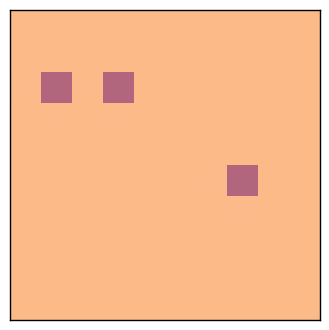

In [2]:
world = World(n=10, num_sick=3)
viewer=WorldViewer(world)
anim = viewer.animate(frames=300)

In [3]:
anim

From running this model a few times, we see an interesting phenomenon where even from the same starting point (in this case, 100 agents with 3 sick agents) the disease tends to either never spread from the originally sick agents to the rest of the population, and those agents simply get better, or will travel in a wave and eventually spread to everyone.

### Experiments Performed: Initial States

##### Question: How does changing the initial number of sick agents impacts the disease spread over time.

##### Methodology: 
We implemented this experiment using our simple model. In this model, all agents have the same level of immunity. The only thing varying is how many of the agents start out sick. These agents are randomly placed in the 2D array. If there are too few, it is possible that no more agents would be infected. If there are too many, the disease will rapidly overwhelm the population.

##### Results
What happened?

Simple Model with 3/100 people initially sick:
![bin graph](https://github.com/hannahtwiggsmith/KillAllAgents/blob/master/reports/images/bg100ppl3sick.png?raw=true)

Simple Model with 5/100 people initially sick:
![bin graph](https://github.com/hannahtwiggsmith/KillAllAgents/blob/master/reports/images/bg100ppl5sick.png?raw=true)

Simple Model with 10/100 people initially sick:
![bin graph](https://github.com/hannahtwiggsmith/KillAllAgents/blob/master/reports/images/bg100ppl10sick.png?raw=true)

Simple Model with 20/100 people initially sick:
![bin graph](https://github.com/hannahtwiggsmith/KillAllAgents/blob/master/reports/images/bg100ppl20sick.png?raw=true)



##### Interpretation
We saw that as we expected, if there are too few agents initially, the disease may not spread at all, as seen  in the first of the figures above. The change in the number of sick individuals over time appears to somewhat follow the behavior in the model in a report we found on the transmissibility and control of H1N1.
![](https://d2ufo47lrtsv5s.cloudfront.net/content/sci/326/5953/729/F4.large.jpg?width=800&height=600&carousel=1)

We are trying to use models like these to validate that our model is representative of real workd disease transmission. From this we learned that our agents seem to be recovering too slowly, which we will need to fix moving forward.

### Extensions

After the completion of our initial simple model, there are several possible directions to go deeper.

#### Extensions in progresss
- Moving vs Still Agents: An experiment is nearly finished to show the difference in disease tramsmission when agents are still as in our simple model, or moving around at random.
- City Clustering: We plan on adding clustering to our model to represent cities. This will allow for us to investigate how the disease might move between groups of people and take social interactions/networks into account. Much of the structure has been set up for this.
- Disease Strengthening: The disease getting stronger over time. We currently have a parameter for disease strength and have qualitatively seen how the outputs vary when we change this parameter, but we still need to make this punchline graph.
- Agent Evolution: While we have not yet dived into the evolution of the agent population over a long period of time, we have explored changing individual agents immunity levels over time. This has been incorporated into the simple model in the form of an immunity/recovered attribute of each agent. In the simple model above, once an agent gets sick, it does not get that same sickness again.

#### Extensions yet to be deeply investigated
Other potential ways we might be able to expand our model once we complete the extensions in progress are included in the list below.
- Could the population evolve to become immune if the susceptibility of agents is dependent on that of their parents?
- Could searching for a “cure” and distributing the cure once discovered prevent the entire population from becoming infected?
- How might attributes of the agents affect their susceptibility? Would agents who are very young or old be more susceptible, and how might this affect infection rates?
- What if agents lived in “households”? These could contain a variety of demographics, such as a four-person family, young couple, or roommate pair. They would be more exposed to the agents that they lived with.
- How does travel (between cities) affect the rate of infection?
- How does infection affect infected agents? Do they stop moving? Do they eventually die?
- What effect would the antivax movement have on a population that is largely herd-immune?
- What if our disease was intelligent (and modeled as an agent)? Could it evolve to further its own interests? (By not killing the host or raising its infection rate.)
- How would extroversion/introversion affect infection rates? Would this also affect the motion of the agent?
- How do different types of infection affect the spread of disease? (respiratory, sexually transmitted, non-human carrier)
- What minimum attributes must the disease have to be able to kill all agents?
- How do different human activities affect the agents involved? (e.g. going to work or school, sports, airports)
- If the disease is genetic, how might we represent that? What would the population look like in thousands of (model) years?


### What Might Possible Results Look Like?/How Do We Plan to Interpret Results?
One possible result representation would be a comparison of the disease spread rate in our simple model with empirical data to validate that we have an accurate foundation to build our extensions on.
Once the extensions are in place, we can create several types of representations of the results based on each extension. Some of the possibilities include a heat map or grid showing the sick population by location for analyzing travel or social network effects, an overlay comparing the results when changing factors behind disease spread such as doctor accessibility, or the population of disease spreading agents including birds or mosquitoes in comparison to the sick human population.
Our final goal is to create an interactive model that allows users to change health, social, and economic factors before viewing the results of their custom simulation.

#### Example Results Figure Sketches

![](https://github.com/hannahtwiggsmith/KillAllAgents/blob/prelim_report/reports/images/moving_still_prelim.JPG?raw=true)

![](https://github.com/hannahtwiggsmith/KillAllAgents/blob/prelim_report/reports/images/urban_rural_prelim.jpg?raw=true)

![](https://github.com/hannahtwiggsmith/KillAllAgents/blob/prelim_report/reports/images/disease_strength_prelim.JPG?raw=true)


![](https://github.com/hannahtwiggsmith/KillAllAgents/blob/prelim_report/reports/images/agent_evolution_prelim.JPG?raw=true)




![](https://github.com/hannahtwiggsmith/KillAllAgents/blob/prelim_report/reports/images/proposal_graphs.jpg?raw=true)

### Learning Goals
###### Hannah:
I would like to learn more about numpy by creating a model where I need to largely come up with my own way of modeling things, as opposed to the homework assignments where I could largely copy/modify code written above. I’m also looking forward to working with visualization libraries to create descriptive (and possible interactive) graphs of our results. I also enjoy the freedom that this project gives us in terms of different directions we could take once we have completed our simple model, because I want to learn more about the intricacies of disease spread, and these very specific extensions give me the opportunity to do that.

Mid-Project checkin: I am satisfied that this project is helping me achieve my original learning goals. I’ve enjoyed learning about some of the more hidden numpy features and using them to create graphs of our results, especially as we move into the phase of the project where we’re working on extensions.

###### Katie:
Identifying correct models and characteristics to do specific analysis and using numpy. Because of the broad scope, this project has opportunities for using a variety of different model types in different ways, which will require choosing and implementing the appropriate model for each extension that we want to explore. We will also use tools such as numpy and matplotlib for modeling and results representation.

###### Brenna:
I originally listed my learning goals to include working with topic relevant to world and learning about agent-based modeling. This project would strongly fulfill both of those goals. I am interested in exploring how agents interact in a system in a more in depth way, and seeing how these types of models behave in a more complex simulation. By applying this tool/method to the concept of infectious disease, I will have the opportunity to connect my work to something in the real world, and draw parallels between our simulations and reality. This project has so much room to grow and expand, and I am very excited about some of the potential extensions to this project, and the opportunities they provide to reach a greater understanding of how these types of models can be made and how they can be both useful and interesting.

Mid-Project checkin: I'm happy with how this project has been fulfilling my learning goals so far and am especially excited about delving into more of the extensions of our model. 

### Annotated Bibliography

Annotated Bibliography

Liliana Perez, Suzana Dragicevic, "An agent-based approach for modeling dynamics of contagious disease spread" International Journal of Health and Geophysics 2009 – Published 05 August 2009 Link: https://ij-healthgeographics.biomedcentral.com/articles/10.1186/1476-072X-8-50 (Links to an external site.) This paper uses an agent-based modelling approach to integrate geographic information about individuals to simulate the spread of contagious disease in an urban setting based on people's daily activities, movement, and geo-spatial interactions between people. The authors' goal was to create a model to show how disease spreads through a network of human interactions, and give people a better understanding of how this occurs in an urban environment. It would be particularly useful for running "what if" scenarios on potential outbreaks.

Azimi, Jomali, Mofrad, “Accounting for Diffusion in Agent Based Models of Reaction-Diffusion Systems with Application to Cytoskeletal Diffusion” Downloaded from http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0025306 (Links to an external site.) In this paper, the authors investigate a computational agent-based model do determine its accuracy in modeling the diffusion of molecules in a three-dimensional solution. They find that their model closely mimics the real behavior of these systems, and they go on to simulate the effects of molecular crowding on effective diffusion.

Andrew T. Crooks, Atesmachew B. Hailegiorgis, "An agent-based modeling approach applied to the spread of cholera" Link: http://www.sciencedirect.com/science/article/pii/S1364815214002515 In this paper, the concept of directly agent based modeling to a specific deisease is explored. The authors' approach will be useful to us when creating a model of a specific disease ourselves. It is especially intereting how they modeled the spread of cholera, which needs a less obvious approach than most diseases.

Kathleen Carley, et al., "BioWar: Acalable Agent-based Model of Bioattacks" Link: http://www.casos.cs.cmu.edu/publications/protected/2005-2006/carley_2006_biowarbioattacks.pdf Looking at the effects that external dynamics such as economics and social networks have on the spread of various diseases

Weidong Gu and Robert Novak, "Agent-based modelling of mosquito foraging behaviour for malaria control" Link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2818421/ Interesting commentary on ways to factor in the causes of diseases as agents themselves rather than attributes of the agents that could be infected

Azadeh Alimadad, Vahid Dabbaghian, Suraj K. Singhk, and Herbert H. Tsang, “Modeling HIV Spread through Sexual Contact using a Cellular Automaton” Link: http://www.cecm.sfu.ca/~mmonagan/MITACS/papers/VahidHIV.pdf Models the transmisson of HIV through a population in the context of social connections.

Chung-Yuan Huang, Chuen-Tsai Sun, Ji-Lung Hsieh, Holin Lin. “Simulating SARS: Small-World Epidemiological Modeling and Public Health Policy Assessments.” Journal of Artificial Societies and Social Simulation vol. 7, no. 4. 31 October, 2004. Link: http://jasss.soc.surrey.ac.uk/7/4/2.html This paper proposes a model of epidemiological scenarios in daily contact social networks using a small-world model. It demonstrates use of 2D automata to model disease spread between social contacts.


Yang, Y., J. D. Sugimoto, M. E. Halloran, N. E. Basta, D. L. Chao, L. Matrajt, G. Potter, E. Kenah, and I. M. Longini. "The Transmissibility and Control of Pandemic Influenza A (H1N1) Virus." Science 326.5953 (2009): 729-33. Web. Link: http://science.sciencemag.org/content/326/5953/729 This paper shows a model of the transmissibility of H1N1 through a population. It has been useful in validating our model's behavior. It is also another resource outlining design of models similar to our own.

 Archer, B. N., G. A. Timothy, C. Cohen, S. Tempia, M. Huma, L. Blumberg, D. Naidoo, A. Cengimbo, and B. D. Schoub. "Introduction of 2009 Pandemic Influenza A Virus Subtype H1N1 Into South Africa: Clinical Presentation, Epidemiology, and Transmissibility of the First 100 Cases." Journal of Infectious Diseases 206.Suppl 1 (2012) This was another useful paper containing a flu transmission model we have used to validate our own model.